<a href="https://colab.research.google.com/github/SanketMN/Assignments/blob/main/NLP%26NaiveBayesassgnmt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('blogs.csv', encoding='latin-1')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [11]:
df['Labels'].value_counts()

,count
Labels,
alt.atheism,100
comp.graphics,100
comp.os.ms-windows.misc,100
comp.sys.ibm.pc.hardware,100
comp.sys.mac.hardware,100
comp.windows.x,100
misc.forsale,100
rec.autos,100
rec.motorcycles,100


In [6]:
df['Labels'].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [7]:
df['Data']

,Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...
...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....


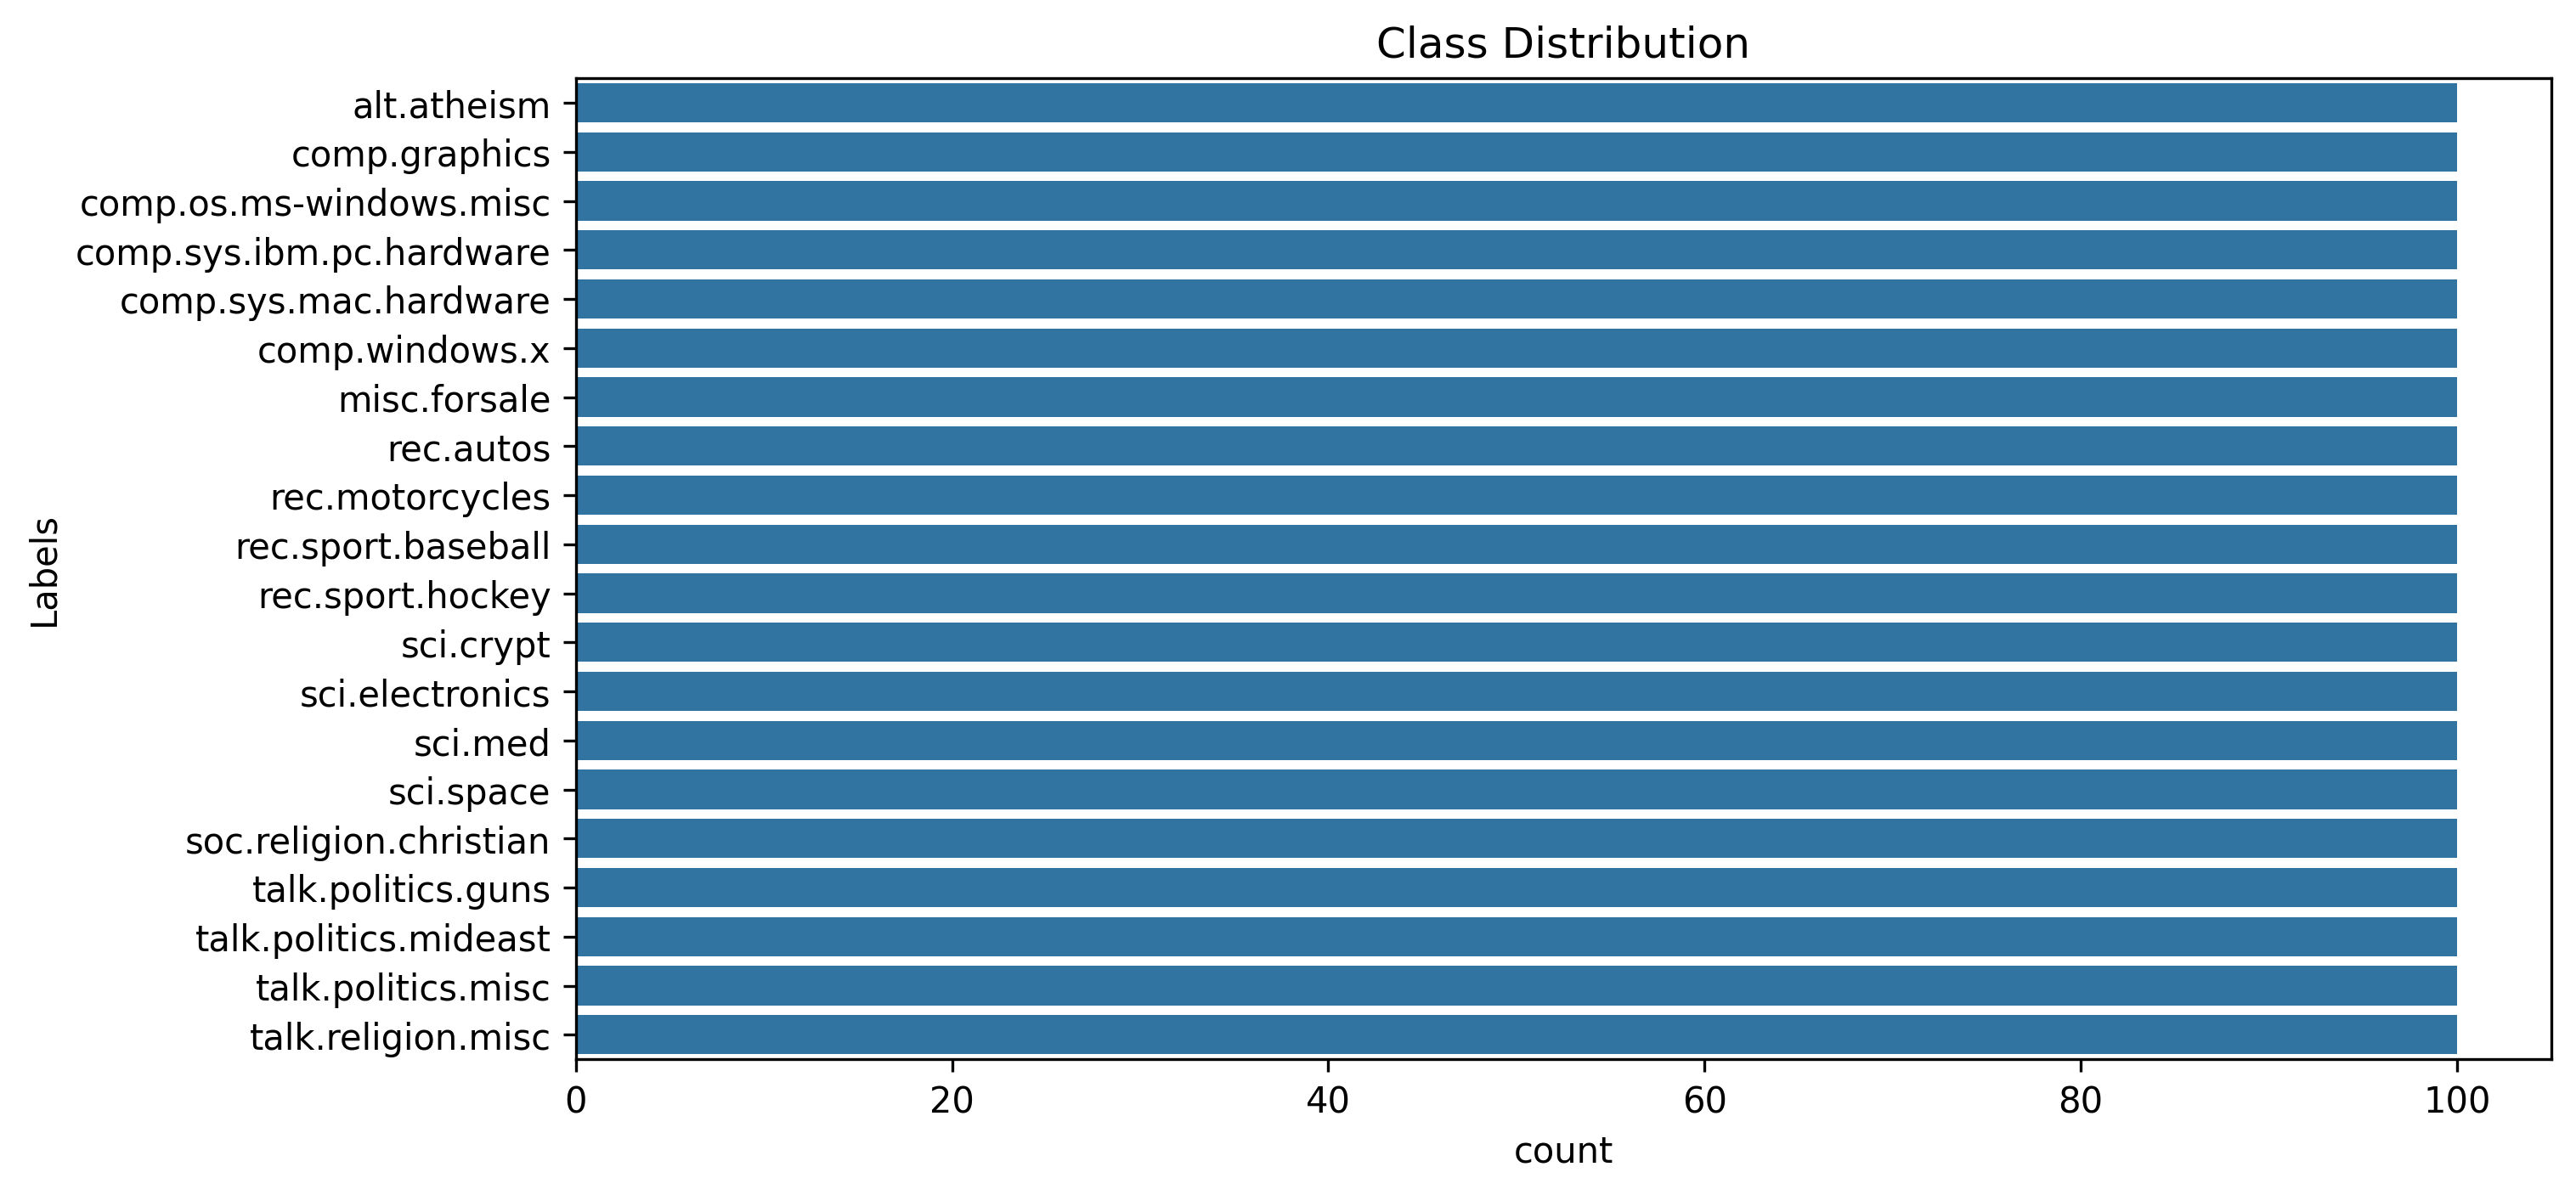

In [14]:
sns.countplot(df['Labels'])
plt.title('Class Distribution')
plt.show()


In [19]:
import re

# Function to clean the text
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|ftp\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+@\S+', '', text)  # Remove email addresses
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Keep only alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join(text.split())  # Remove extra whitespace
    return text

# Apply cleaning function to the Data column
df['Cleaned_Data'] = df['Data'].apply(clean_text)

# Check the cleaned text
print(df[['Data', 'Cleaned_Data']].head())


                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        Cleaned_Data  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesrvcscmue...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism talkreli...  


In [20]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stopwords
df['Cleaned_Data'] = df['Cleaned_Data'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
df['Cleaned_Data'] = df['Cleaned_Data'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))


In [22]:
print(df[['Cleaned_Data', 'Labels']].head())


                                        Cleaned_Data       Labels
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  alt.atheism
1  newsgroup altath path cantaloupesrvcscmueducra...  alt.atheism
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  alt.atheism
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  alt.atheism
4  xref cantaloupesrvcscmuedu altath talkreligion...  alt.atheism


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform the cleaned data
X = tfidf_vectorizer.fit_transform(df['Cleaned_Data'])  # Features
y = df['Labels']  # Labels (target)

print(f"Shape of Feature Matrix (TF-IDF): {X.shape}")



Shape of Feature Matrix (TF-IDF): (2000, 5000)


In [29]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")


Training set size: 1600, Testing set size: 400


In [30]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)


MultinomialNB()

In [31]:
from sklearn.metrics import accuracy_score, classification_report


# Make predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.84
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.74      0.70      0.72        20
           comp.graphics       0.89      0.85      0.87        20
 comp.os.ms-windows.misc       0.76      0.80      0.78        20
comp.sys.ibm.pc.hardware       0.58      0.70      0.64        20
   comp.sys.mac.hardware       0.82      0.70      0.76        20
          comp.windows.x       0.94      0.85      0.89        20
            misc.forsale       0.86      0.95      0.90        20
               rec.autos       0.95      0.90      0.92        20
         rec.motorcycles       0.95      0.95      0.95        20
      rec.sport.baseball       1.00      1.00      1.00        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.91      1.00      0.95        20
         sci.electronics       0.83      0.75      0.79        20
                 sci.med       0.94  

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [33]:
# Function to classify sentiment
def get_sentiment(text):
    scores = sentiment_analyzer.polarity_scores(text)  # Get polarity scores
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply to the Cleaned_Data column
df['Predicted_Sentiment'] = df['Cleaned_Data'].apply(get_sentiment)

# Check some results
print(df[['Cleaned_Data', 'Predicted_Sentiment']].head())


                                        Cleaned_Data Predicted_Sentiment
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...            negative
1  newsgroup altath path cantaloupesrvcscmueducra...            positive
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...            negative
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...            negative
4  xref cantaloupesrvcscmuedu altath talkreligion...            positive


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text data
X = tfidf_vectorizer.fit_transform(df['Cleaned_Data'])
y = df['Labels']  # Ensure Labels contain sentiment categories (positive/negative)

print(f"Shape of Feature Matrix: {X.shape}")


Shape of Feature Matrix: (2000, 5000)


In [35]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [36]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [37]:
from sklearn.metrics import accuracy_score, classification_report

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 0.84
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.74      0.70      0.72        20
           comp.graphics       0.89      0.85      0.87        20
 comp.os.ms-windows.misc       0.76      0.80      0.78        20
comp.sys.ibm.pc.hardware       0.58      0.70      0.64        20
   comp.sys.mac.hardware       0.82      0.70      0.76        20
          comp.windows.x       0.94      0.85      0.89        20
            misc.forsale       0.86      0.95      0.90        20
               rec.autos       0.95      0.90      0.92        20
         rec.motorcycles       0.95      0.95      0.95        20
      rec.sport.baseball       1.00      1.00      1.00        20
        rec.sport.hockey       1.00      1.00      1.00        20
               sci.crypt       0.91      1.00      0.95        20
         sci.electronics       0.83      0.75      0.79        20
                 sci.med       0.94  